##### Your name and student ID
- Name: _____
- ID: _____

##### How To Filter Pandas Dataframe By Values of Column?

In [101]:
import numpy as np
import pandas as pd
# Create a DataFrame using a NumPy array, with a datetime index
eat = np.random.randint(10,size=(7,3))*5+50
dates = pd.date_range('20170812',periods=7)
df0 = pd.DataFrame(eat)
#加上欄位 with columns amd index
df1 = pd.DataFrame(eat, index=dates, columns=['Break','Lunch','Dinner'])
display(df1)

,Break,Lunch,Dinner
2017-08-12,95,75,75
2017-08-13,70,55,85
2017-08-14,85,70,95
2017-08-15,95,75,60
2017-08-16,50,50,55
2017-08-17,55,60,80
2017-08-18,65,55,95


In [102]:
# Looking for days when the lunch bill exceeds 80
df1['Lunch']>80

2017-08-12    False
2017-08-13    False
2017-08-14    False
2017-08-15    False
2017-08-16    False
2017-08-17    False
2017-08-18    False
Freq: D, Name: Lunch, dtype: bool

In [103]:
(df1['Lunch']>80).sum()

0

In [104]:
df1[df1['Lunch']>80]

,Break,Lunch,Dinner


In [ ]:
# Looking for days with two conditions

In [105]:
#"Lunch " > 70 Break <60
#meet both

c1=df1["Lunch"]>70
c2=df1["Break"]<60
#meet any of them
c1 & c2
display(df1[c1&c2])
display(df1[c1|c2])

,Break,Lunch,Dinner


,Break,Lunch,Dinner
2017-08-12,95,75,75
2017-08-15,95,75,60
2017-08-16,50,50,55
2017-08-17,55,60,80


In [5]:
# What is the following statments?

df1.iloc[2,2] = 95
df1.loc['20170818','Lunch'] = 60
df1.Dinner[df1.Break>80] = 40
df1.loc['20170814','Break'] = np.nan

print(df1)


            Break  Lunch  Dinner
2017-08-12   55.0     70      80
2017-08-13   50.0     80      55
2017-08-14    NaN     80      95
2017-08-15   90.0     85      40
2017-08-16   95.0     75      40
2017-08-17   50.0     70      55
2017-08-18   55.0     60      80


In [106]:
df1[df1>80]

,Break,Lunch,Dinner
2017-08-12,95.0,NaN,NaN
2017-08-13,NaN,NaN,85.0
2017-08-14,85.0,NaN,95.0
2017-08-15,95.0,NaN,NaN
2017-08-16,NaN,NaN,NaN
2017-08-17,NaN,NaN,NaN
2017-08-18,NaN,NaN,95.0


In [12]:
# what is where
df1.where(df1>80,0) # keep the value meet the condition and the other =>none


,Break,Lunch,Dinner
2017-08-12,0,0,0
2017-08-13,0,0,0
2017-08-14,0,0,0
2017-08-15,0,90,0
2017-08-16,0,0,0
2017-08-17,0,95,90
2017-08-18,0,0,0


In [9]:
df1[df1>80]

,Break,Lunch,Dinner
2017-08-12,NaN,NaN,NaN
2017-08-13,NaN,NaN,NaN
2017-08-14,NaN,NaN,NaN
2017-08-15,NaN,90.0,NaN
2017-08-16,NaN,NaN,NaN
2017-08-17,NaN,95.0,90.0
2017-08-18,NaN,NaN,NaN


In [13]:
df1.mask(df1>80)
#meet the condition =>NaN


,Break,Lunch,Dinner
2017-08-12,50,80.0,65.0
2017-08-13,80,60.0,75.0
2017-08-14,55,70.0,65.0
2017-08-15,70,NaN,75.0
2017-08-16,70,75.0,55.0
2017-08-17,60,NaN,NaN
2017-08-18,60,65.0,75.0


In [14]:
df1.mask(df1>80,0) #符合條件的變成指定數字

,Break,Lunch,Dinner
2017-08-12,50,80,65
2017-08-13,80,60,75
2017-08-14,55,70,65
2017-08-15,70,0,75
2017-08-16,70,75,55
2017-08-17,60,0,0
2017-08-18,60,65,75


### 01. Generate descriptive statistics
- Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
- Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. 

- Data sourse: http://data.gov.tw/node/6213

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

plt.style.use('ggplot')
# https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html
%matplotlib inline

df = pd.read_csv('A_LVR_LAND_A.csv', encoding='big5') #檔案名
# IF EXCEL  pd.read_excel('xxxx.xlsx', sheet_name="xx") #檔案名
df.columns=["Area", "Room", "Hall", "Bath", "Price"] #rename the columns
df

,Area,Room,Hall,Bath,Price
0,133.85,3,2,2,13600000
1,74.08,0,2,1,19700000
2,109.87,3,2,2,12550000
3,50.02,1,1,1,9800000
4,81.38,3,2,2,15800000
...,...,...,...,...,...
647,190.09,3,2,2,28000000
648,135.16,2,2,1,18700000
649,41.06,2,1,1,6500000
650,112.10,4,1,1,11660000


In [19]:
# descriptive statistics
df.describe()

,Area,Room,Hall,Bath,Price
count,652.000000,652.000000,652.000000,652.000000,6.520000e+02
mean,129.942883,2.101227,1.292945,1.299080,2.486568e+07
std,165.034569,3.030140,0.859614,1.022541,2.979792e+07
min,0.000000,0.000000,0.000000,0.000000,5.065000e+03
25%,52.647500,1.000000,1.000000,1.000000,9.500000e+06
50%,95.095000,2.000000,2.000000,1.000000,1.550000e+07
75%,148.810000,3.000000,2.000000,2.000000,2.802000e+07
max,2459.840000,68.000000,4.000000,7.000000,2.438000e+08


In [22]:
# Mean of the values.
df1.mean()

Break     63.571429
Lunch     76.428571
Dinner    71.428571
dtype: float64

In [20]:
# Maximum of the values in the object.
df1.max()

Break     50
Lunch     60
Dinner    55
dtype: int64

In [23]:
# Minimum of the values in the object.
df1.min()

Break     50
Lunch     60
Dinner    55
dtype: int64

In [26]:
# Median of the values in the object.
df1.median()

Break     60.0
Lunch     75.0
Dinner    75.0
dtype: float64

In [27]:
# Sum of the values in the object.
df1.sum()

Break     445
Lunch     535
Dinner    500
dtype: int64

In [28]:
# Standard deviation of the observations.
df1.std()

Break     10.293317
Lunch     12.817399
Dinner    11.073349
dtype: float64

In [29]:
# Return values at the given quantile
df1.quantile(0.75)

Break     70.0
Lunch     85.0
Dinner    75.0
Name: 0.75, dtype: float64

<AxesSubplot:title={'center':'PDF'}, ylabel='Density'>

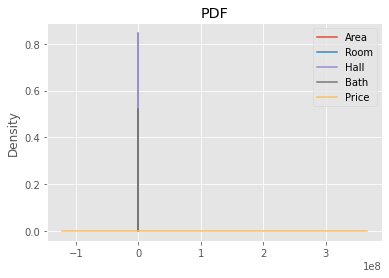

In [31]:
# Generate Kernel Density Estimate plot using Gaussian kernels.
df.plot(kind="kde",title="PDF")

<AxesSubplot:title={'center':'Histogram'}, ylabel='Frequency'>

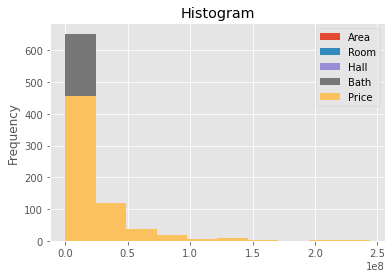

In [33]:
# Draw one histogram of the DataFrame’s columns.
df.plot(kind="hist",title="Histogram")

<AxesSubplot:title={'center':'PDF'}, ylabel='Density'>

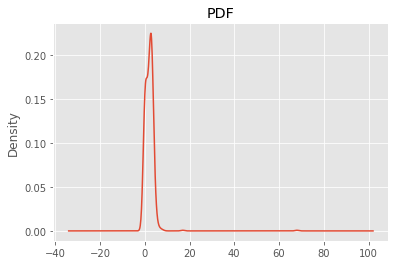

In [32]:
df["Room"].plot(kind="kde",title="PDF")

<AxesSubplot:title={'center':'Histogram'}, ylabel='Frequency'>

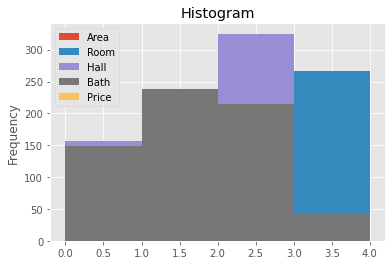

In [34]:
df.plot(kind="hist",title="Histogram",bins=[0,1,2,3,4])

### 02. Correlation
- Method of correlation:
 - pearson : standard correlation coefficient
 - kendall : Kendall Tau correlation coefficient
 - spearman : Spearman rank correlation

In [35]:
# Compute pairwise correlation of columns
df.corr()

,Area,Room,Hall,Bath,Price
Area,1.000000,0.195329,0.159584,0.303817,0.627678
Room,0.195329,1.000000,0.343025,0.503330,0.142180
Hall,0.159584,0.343025,1.000000,0.672597,0.089311
Bath,0.303817,0.503330,0.672597,1.000000,0.284548
Price,0.627678,0.142180,0.089311,0.284548,1.000000


<AxesSubplot:title={'center':'correlationship'}, xlabel='Price', ylabel='Area'>

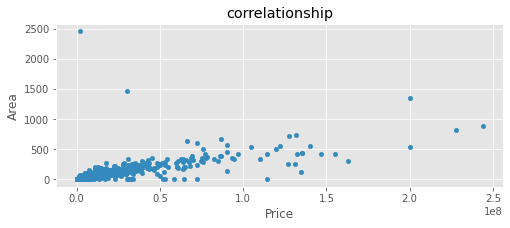

In [36]:
from matplotlib.font_manager import FontProperties
from pylab import mpl
df.plot(kind='scatter',title='correlationship',figsize=(8,3),x='Price',y='Area',marker='o')

<AxesSubplot:title={'center':'correlationship'}, xlabel='Price', ylabel='Hall'>

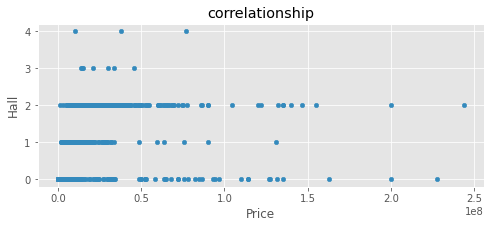

In [37]:
from matplotlib.font_manager import FontProperties
from pylab import mpl
df.plot(kind='scatter',title='correlationship',figsize=(8,3),x='Price',y='Hall',marker='o')

### 03. Groupby/Aggregation/Pivot
- Pandas dataframe.groupby() function is used to split the data into groups based on some criteria. pandas objects can be split on any of their axes. The abstract definition of grouping is to provide a mapping of labels to group names.
- An essential piece of analysis of large data is efficient summarization: computing aggregations like sum(), mean(), median(), min(), and max(), in which a single number gives insight into the nature of a potentially large dataset. 
- count（個數）, sum（加總）, mean（平均）, median（中位數）, std（標準差）, var（變異數）, first（第一個非NA）, last（最後一個非NA）, max, min

In [109]:
# Class A, Class B & Class C grade

import pandas as pd

df = pd.DataFrame({'Class':['A','A','A','A','A','B','B','B','B','B','C','C','C','C','C'],
                   'Gender':['0','0','0','1','1','0','0','1','1','1','0','1','1','1','1'],
                   'Test01':[80,70,83,82,61,65,80,76,65,80,76,65,80,76,56],
                   'Test02':[90,80,83,80,70,83,82,64,84,94,65,55,35,91,82]})
df

,Class,Gender,Test01,Test02
0,A,0,80,90
1,A,0,70,80
2,A,0,83,83
3,A,1,82,80
4,A,1,61,70
5,B,0,65,83
6,B,0,80,82
7,B,1,76,64
8,B,1,65,84
9,B,1,80,94


In [45]:
# Finding the mean score of each Class
# 班級平均
df.groupby("Class").mean()

,Test01,Test02
Class,,
A,75.2,80.6
B,73.2,81.4
C,70.6,65.6


In [46]:
# Finding the mean score of each Gender
df.groupby("Gender").mean()

,Test01,Test02
Gender,,
0,75.666667,80.500000
1,71.222222,72.777778


In [110]:
# Finding the mean score of Class (first) and Gender
df.groupby(["Class","Gender"]).mean()

Test01     Test02
Class Gender                      
A     0       77.666667  84.333333
      1       71.500000  75.000000
B     0       72.500000  82.500000
      1       73.666667  80.666667
C     0       76.000000  65.000000
      1       69.250000  65.750000

In [111]:
# Finding the summary population for each Class (first) and Gender
df.groupby(["Class","Gender"]).count()

Test01  Test02
Class Gender                
A     0            3       3
      1            2       2
B     0            2       2
      1            3       3
C     0            1       1
      1            4       4

In [48]:
# Finding the mean and sum at the same time
df.groupby("Class").aggregate(["mean","sum"])

Test01      Test02     
        mean  sum   mean  sum
Class                        
A       75.2  376   80.6  403
B       73.2  366   81.4  407
C       70.6  353   65.6  328

In [113]:
# pivot_table 資料透視表
import pandas as pd
df = pd.DataFrame({'constellation':['Libra','Gemini','Libra','Pisces','Libra','Gemini','Scorpio','Aquarius','Libra','Gemini'],
                   'gender':['M','M','M','M','M','F','F','F','F','F'],
                   'age':[80,83,82,61,65,80,76,65,80,76]})
df

,constellation,gender,age
0,Libra,M,80
1,Gemini,M,83
2,Libra,M,82
3,Pisces,M,61
4,Libra,M,65
5,Gemini,F,80
6,Scorpio,F,76
7,Aquarius,F,65
8,Libra,F,80
9,Gemini,F,76


In [53]:
#groupby
df.groupby("constellation").mean()

,age
constellation,
Aquarius,65.000000
Gemini,79.666667
Libra,76.750000
Pisces,61.000000
Scorpio,76.000000


In [54]:
df.groupby("gender").mean()

,age
gender,
F,75.4
M,74.2


In [58]:
df.groupby(["constellation","gender"]).mean()

age
constellation gender           
Aquarius      F       65.000000
Gemini        F       78.000000
              M       83.000000
Libra         F       80.000000
              M       75.666667
Pisces        M       61.000000
Scorpio       F       76.000000

In [57]:
df.groupby("constellation").aggregate(["mean","sum"])

age     
                    mean  sum
constellation                
Aquarius       65.000000   65
Gemini         79.666667  239
Libra          76.750000  307
Pisces         61.000000   61
Scorpio        76.000000   76

In [59]:
df.pivot_table(index="gender", columns="constellation", aggfunc="mean")

age                                 
constellation Aquarius Gemini      Libra Pisces Scorpio
gender                                                 
F                 65.0   78.0  80.000000    NaN    76.0
M                  NaN   83.0  75.666667   61.0     NaN

In [60]:
df.pivot_table(index="gender", columns="constellation", aggfunc="count")

age                            
constellation Aquarius Gemini Libra Pisces Scorpio
gender                                            
F                  1.0    2.0   1.0    NaN     1.0
M                  NaN    1.0   3.0    1.0     NaN

### 04. Pandas concatenation

In [67]:
# concat => 水平或垂直
# The concat() function is used to concatenate pandas objects along a particular axis with optional set logic along the other axes.

import pandas as pd
import numpy as np

df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*2, columns=['a','b','c','d'])

display(df1,df2,df3)

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0


,a,b,c,d
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0


,a,b,c,d
0,2.0,2.0,2.0,2.0
1,2.0,2.0,2.0,2.0
2,2.0,2.0,2.0,2.0


In [66]:
#concat縱向合併
res = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
res

,a,b,c,d,e
0,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,NaN
3,NaN,1.0,1.0,1.0,1.0
4,NaN,1.0,1.0,1.0,1.0
5,NaN,1.0,1.0,1.0,1.0
6,2.0,2.0,2.0,2.0,NaN
7,2.0,2.0,2.0,2.0,NaN
8,2.0,2.0,2.0,2.0,NaN


In [69]:
#concat橫向合併
res = pd.concat([df1, df2, df3], axis=1, ignore_index=True)
res

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0


In [74]:
#concat + join, [''inner','outer']
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'], index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d','e'], index=[2,3,4])
display(df1,df2)

,a,b,c,d
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0


,b,c,d,e
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0


In [73]:
res = pd.concat([df1, df2], axis=0, join='outer', ignore_index=True )#聯集
res

,a,b,c,d,e
0,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,NaN
3,NaN,1.0,1.0,1.0,1.0
4,NaN,1.0,1.0,1.0,1.0
5,NaN,1.0,1.0,1.0,1.0


In [76]:
# merge =>join
import pandas as pd

left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K1', 'K2', 'K3', 'K4'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})
display(left,right)


,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


,key,C,D
0,K1,C0,D0
1,K2,C1,D1
2,K3,C2,D2
3,K4,C3,D3


In [77]:
res = pd.merge(left, right, on='key')
res

,key,A,B,C,D
0,K1,A1,B1,C0,D0
1,K2,A2,B2,C1,D1
2,K3,A3,B3,C2,D2


In [79]:
# merge
# The merge() function is used to merge DataFrame or named Series objects with a database-style join.

import pandas as pd

AA = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K1', 'K0', 'K1'],
                      'A': ['A0', 'A1', 'A2', 'A3'],  'B': ['B0', 'B1', 'B2', 'B3']})
BB = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                       'key2': ['K0', 'K0', 'K0', 'K0'],
                       'C': ['C0', 'C1', 'C2', 'C3'],   'D': ['D0', 'D1', 'D2', 'D3']})

# join by key1 and key2, folliwing ['left', 'right', 'outer', 'inner'] method

display(AA,BB)

,key1,key2,A,B
0,K0,K0,A0,B0
1,K1,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [78]:
res = pd.merge(AA, BB, on=['key1', 'key2'], how='inner')
res

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [80]:
res = pd.merge(AA, BB, on=['key1', 'key2'], how='outer')
res

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


### 05. Practice

In [81]:
#  Write a Pandas program to create and display a DataFrame from a specified dictionary data which has the index labels.
import numpy as np
import pandas as pd
exam_data  = {'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
        'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
        'attempts': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [82]:
pd.DataFrame(exam_data)

,name,score,attempts,qualify
0,Anastasia,12.5,1,yes
1,Dima,9.0,3,no
2,Katherine,16.5,2,yes
3,James,NaN,3,no
4,Emily,9.0,2,no
5,Michael,20.0,3,yes
6,Matthew,14.5,1,yes
7,Laura,NaN,1,no
8,Kevin,8.0,2,no
9,Jonas,19.0,1,yes


In [84]:
# Write a Pandas program to display a summary of the describle information
dfs=pd.DataFrame(exam_data)
dfs.describe()

,score,attempts
count,8.000000,10.000000
mean,13.562500,1.900000
std,4.693746,0.875595
min,8.000000,1.000000
25%,9.000000,1.000000
50%,13.500000,2.000000
75%,17.125000,2.750000
max,20.000000,3.000000


In [ ]:
# Write a Pandas program to get the first 5 rows of a given

In [85]:
dfs.head(5)

,name,score,attempts,qualify
0,Anastasia,12.5,1,yes
1,Dima,9.0,3,no
2,Katherine,16.5,2,yes
3,James,NaN,3,no
4,Emily,9.0,2,no


In [89]:
# Write a Pandas program to select the 'name' and 'score' columns from the following DataFrame
dfs[["name","score"]]

,name,score
0,Anastasia,12.5
1,Dima,9.0
2,Katherine,16.5
3,James,NaN
4,Emily,9.0
5,Michael,20.0
6,Matthew,14.5
7,Laura,NaN
8,Kevin,8.0
9,Jonas,19.0


In [98]:
# Write a Pandas program to select the rows where the number of attempts in the examination is greater than 2
c1=dfs["attempts"]>2
display(dfs[c1])

,name,score,attempts,qualify
1,Dima,9.0,3,no
3,James,NaN,3,no
5,Michael,20.0,3,yes


In [ ]:
# Write a Pandas program to select the rows the score is between 15 and 20 (inclusive)

In [97]:
c1=dfs["score"]>15
c2=dfs["score"]<20
display(dfs[c1&c2])

,name,score,attempts,qualify
2,Katherine,16.5,2,yes
9,Jonas,19.0,1,yes


In [ ]:
# Write a Pandas program to delete the 'attempts' column from the DataFrame.

In [99]:
dfs.drop(columns="attempts")

,name,score,qualify
0,Anastasia,12.5,yes
1,Dima,9.0,no
2,Katherine,16.5,yes
3,James,NaN,no
4,Emily,9.0,no
5,Michael,20.0,yes
6,Matthew,14.5,yes
7,Laura,NaN,no
8,Kevin,8.0,no
9,Jonas,19.0,yes
